In [ ]:
import requests

import pandas as pd

import numpy as np

import plotly.express as px

print('Libraries imported')

Libraries imported


Here is an example of how to get the data using API and visualize it.


In [ ]:
url = 'https://www.waterlevels.gc.ca/eng/station?sid=215'

response = requests.get(url)

dfs = pd.read_html(response.text) # construct dataframe

tideHeight = dfs[7]['Hour'].transpose() # select the 7th frame and transpose columns and rows



tideList = [] # construct a list from the tideHeight data

for key in tideHeight.keys():

    tideList.extend(tideHeight[key].tolist())



df = pd.DataFrame(tideList) # turn the list into a dataframe

df.columns = ['Height (m)'] # label the height column

df['Time (h)'] = range(0,len(tideList)) # add a time (in hours) column



fig = px.line(df, x='Time (h)', y='Height (m)', title='Joggins Wharf Tide Data') # create graph

fig.show()

# Annual House Pricing Index

House pricing index (HPI) is the percent change in residential housing price, from a certain start date. 

Our dataset contains the following fields:
* **REF_DATE**	(e.g. 2017, 2018, 2019): \\
start date
* **GEO**	(e.g. 'Canada', 'St. John's, Newfoundland and Labrador'): \\
geographical location
* **DGUID** (e.g. 2016A000011124, 2011S0503001, 2011S0504105): \\
some kind of index?
* **Base year**	(one value: Index, 201612=100): \\
used to extract dataset from database
* **New housing price indexes**	(one value: Total, house and land): \\
indicates that the HPIs are calculated are totals for house and land
* **UOM**	(one value: Index, 201612=100): \\
used to extract dataset from database
* **UOM_ID**	(one value: 347): \\
relational database key
* **SCALAR_FACTOR** (one value: units): \\
used to extract dataset from database
* **SCALAR_ID** (one value: 0): \\
relational database key
* **VECTOR** (e.g. v112068508, v112068509, v112068510): \\
not sure what this is
* **COORDINATE** (e.g. 1.5.1, 2.5.1, 3.5.1): \\
not sure what this is
* **VALUE** (e.g. 100, 1.16, 0.15): \\
HPI (%)
* **STATUS** (empty)
* **SYMBOL** (empty)
* **TERMINATED** (empty)
* **DECIMALS** (one value: 2): \\
indicates that all HPI values are reported up to two decimal places

In [ ]:
Murl = 'https://open.canada.ca/data/en/dataset/7f497684-c857-4184-842c-6bc021f380f8'

response = requests.get(Murl)



dfs = pd.read_html(response.text) # construct dataframe



In [ ]:
# The following code extracts the dataset we chose for this weekly project
# by directly downloading the file instead of API calling it (a method of data
# extraction). The file format of this file is CSV, and the data extracted is 
# represented as a data frame (a processing tool from the pandas package). We 
# display entries within this data frame below.

# We plan to use an API call in the near future following project specifications.

from google.colab import files
uploaded = files.upload()
import io
housingDF = pd.read_csv(io.BytesIO(uploaded['dataset_not from API call.csv']))
# Dataset is now stored in a Pandas Dataframe
housingDF.head()  

Saving dataset_not from API call.csv to dataset_not from API call.csv


,REF_DATE,GEO,DGUID,Base year,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017,Canada,2016A000011124,"Index, 201612=100","Total, house and land","Index, 201612=100",347,units,0,v112068508,1.5.1,100.00,NaN,NaN,NaN,2
1,2017,"St. John's, Newfoundland and Labrador",2011S0503001,"Index, 201612=100","Total, house and land","Index, 201612=100",347,units,0,v112068509,2.5.1,1.16,NaN,NaN,NaN,2
2,2017,"Charlottetown, Prince Edward Island",2011S0504105,"Index, 201612=100","Total, house and land","Index, 201612=100",347,units,0,v112068510,3.5.1,0.15,NaN,NaN,NaN,2
3,2017,"Halifax, Nova Scotia",2011S0503205,"Index, 201612=100","Total, house and land","Index, 201612=100",347,units,0,v112068511,4.5.1,0.72,NaN,NaN,NaN,2
4,2017,"Saint John, Fredericton and Moncton, New Bruns...",2011S0503310,"Index, 201612=100","Total, house and land","Index, 201612=100",347,units,0,v112068512,5.5.1,1.02,NaN,NaN,NaN,2


In [ ]:
housing=housingDF.drop(['STATUS', 'SYMBOL', 'TERMINATED','SCALAR_ID'], axis=1)
housing.head()

housing1=pd.DataFrame(housing,columns=['REF_DATE', 'GEO', 'VALUE'] )
housing1.head()

,REF_DATE,GEO,VALUE
0,2017,Canada,100.00
1,2017,"St. John's, Newfoundland and Labrador",1.16
2,2017,"Charlottetown, Prince Edward Island",0.15
3,2017,"Halifax, Nova Scotia",0.72
4,2017,"Saint John, Fredericton and Moncton, New Bruns...",1.02


In [ ]:
housing1.shape
# There are 112 rows and 3 columns in the housing1 data frame.

(112, 3)

In [ ]:
#There are some possible chart for exploring the data
#1. distribution of value for each year
#2. year vs GEO vs changing rate of value
#3. show in a map
#4. statistical modeling (may not possible)

In [ ]:
group = housing1.groupby('REF_DATE')
group.mean()

,VALUE
REF_DATE,
2017,7.143214
2018,7.143929
2019,7.142143
2020,7.142500


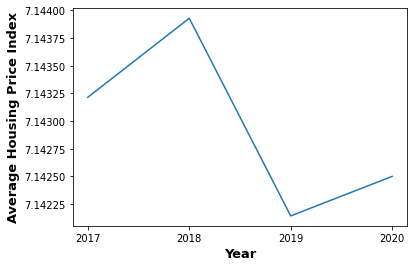

In [ ]:
# line graph of year and value
import matplotlib.pyplot as plt
plt.plot(housing1.REF_DATE.unique(), group.mean())
plt.xlabel("Year",fontsize=13,fontweight='bold')
plt.ylabel("Average Housing Price Index",fontsize=13,fontweight='bold')
my_x_ticks = np.arange(2017, 2021, 1)
plt.xticks(my_x_ticks)
plt.show()
# It shows the average value changes through years. Specifically,
# the following graph plots the average Housing Price Index across
# all municipalities in Canada for the years 2017, 2018, 2019,
# and 2020. There are only four data points on this graph,
# lines are drawn between the data points for aesthetic reasons.

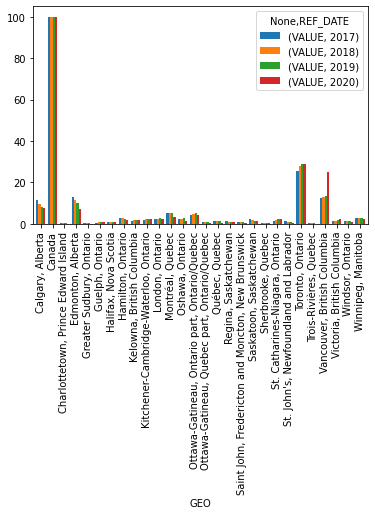

In [ ]:
# Bar chart for year, location and value.
# This bar chart evaluates the Housing Price Index for all of the locations
# in Canada listed below, where the Housing Price Indices are colour coded
# by year. The years are 2017 - 2020.

# In the following code, we first extract the 'GEO' and 'REF_DATE' columns
# of the housing1 data frame, then construct the bars by determining their
# corresponding entries in the 'VALUE' column of the housing1 data frame. The 
# width parameter for the bars is set at 0.8.

# Legend for the bar chart:

# The label 'GEO' on the horizontal axis represents location.

# The vertical axis represents the Housing Price Index and the numbers on the
# vertical axis are percentages.

# Blue (the colour labelled as VALUE, 2017) represents the Housing Price Index 
# in 2017. Orange, green, and red represent similar quantities for the years 
# 2018, 2019, and 2020 respectively.

housing1.groupby(['GEO','REF_DATE'],sort=True).sum()[['VALUE']].unstack().plot(kind="bar",width = 0.8)


In [ ]:
#It seems it set Canada as a baseline, I tried to remove Canada here
#I did not change the data frame 'housing1' here
housing1[~housing1.GEO.str.contains("Canada")].shape

(108, 3)

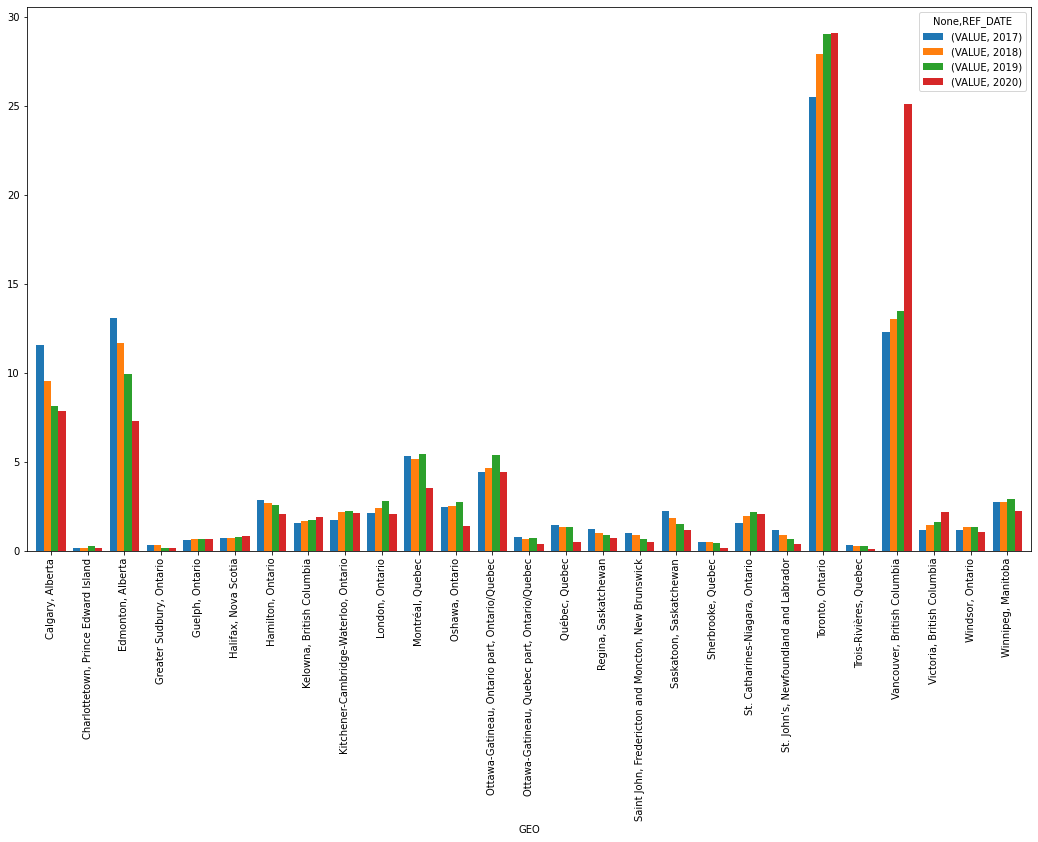

In [ ]:
# This bar chart evaluates the Housing Price Index for all of the locations
# in Canada listed below, where the Housing Price Indices are colour coded
# by year. The years are 2017 - 2020.

# In the following code, we first extract the 'GEO' and 'REF_DATE' columns
# of the housing1 data frame. Moreover, in the following code, we require
# that all locations are within Canada. Afterwards, we construct the bars by 
# determining their corresponding entries in the 'VALUE' column of the housing1
# data frame. The width  parameter for the bars is set at 0.8, and the width and 
# height dimensions for displaying the figure is determined by the parameters 
# (18, 10).

# Legend for the bar chart:

# The label 'GEO' on the horizontal axis represents location.

# The vertical axis represents the Housing Price Index and the numbers on the
# vertical axis are percentages.

# Blue (VALUE, 2017) represents the Housing Price Index in 2017. Orange,
# green, and red represent similar quantities for the years 2018, 2019, and
# 2020 respectively.

housing1[~housing1.GEO.str.contains("Canada")].groupby(['GEO','REF_DATE'],sort=True).sum()[['VALUE']].unstack().plot(kind="bar",width = 0.8,figsize=(18,10))




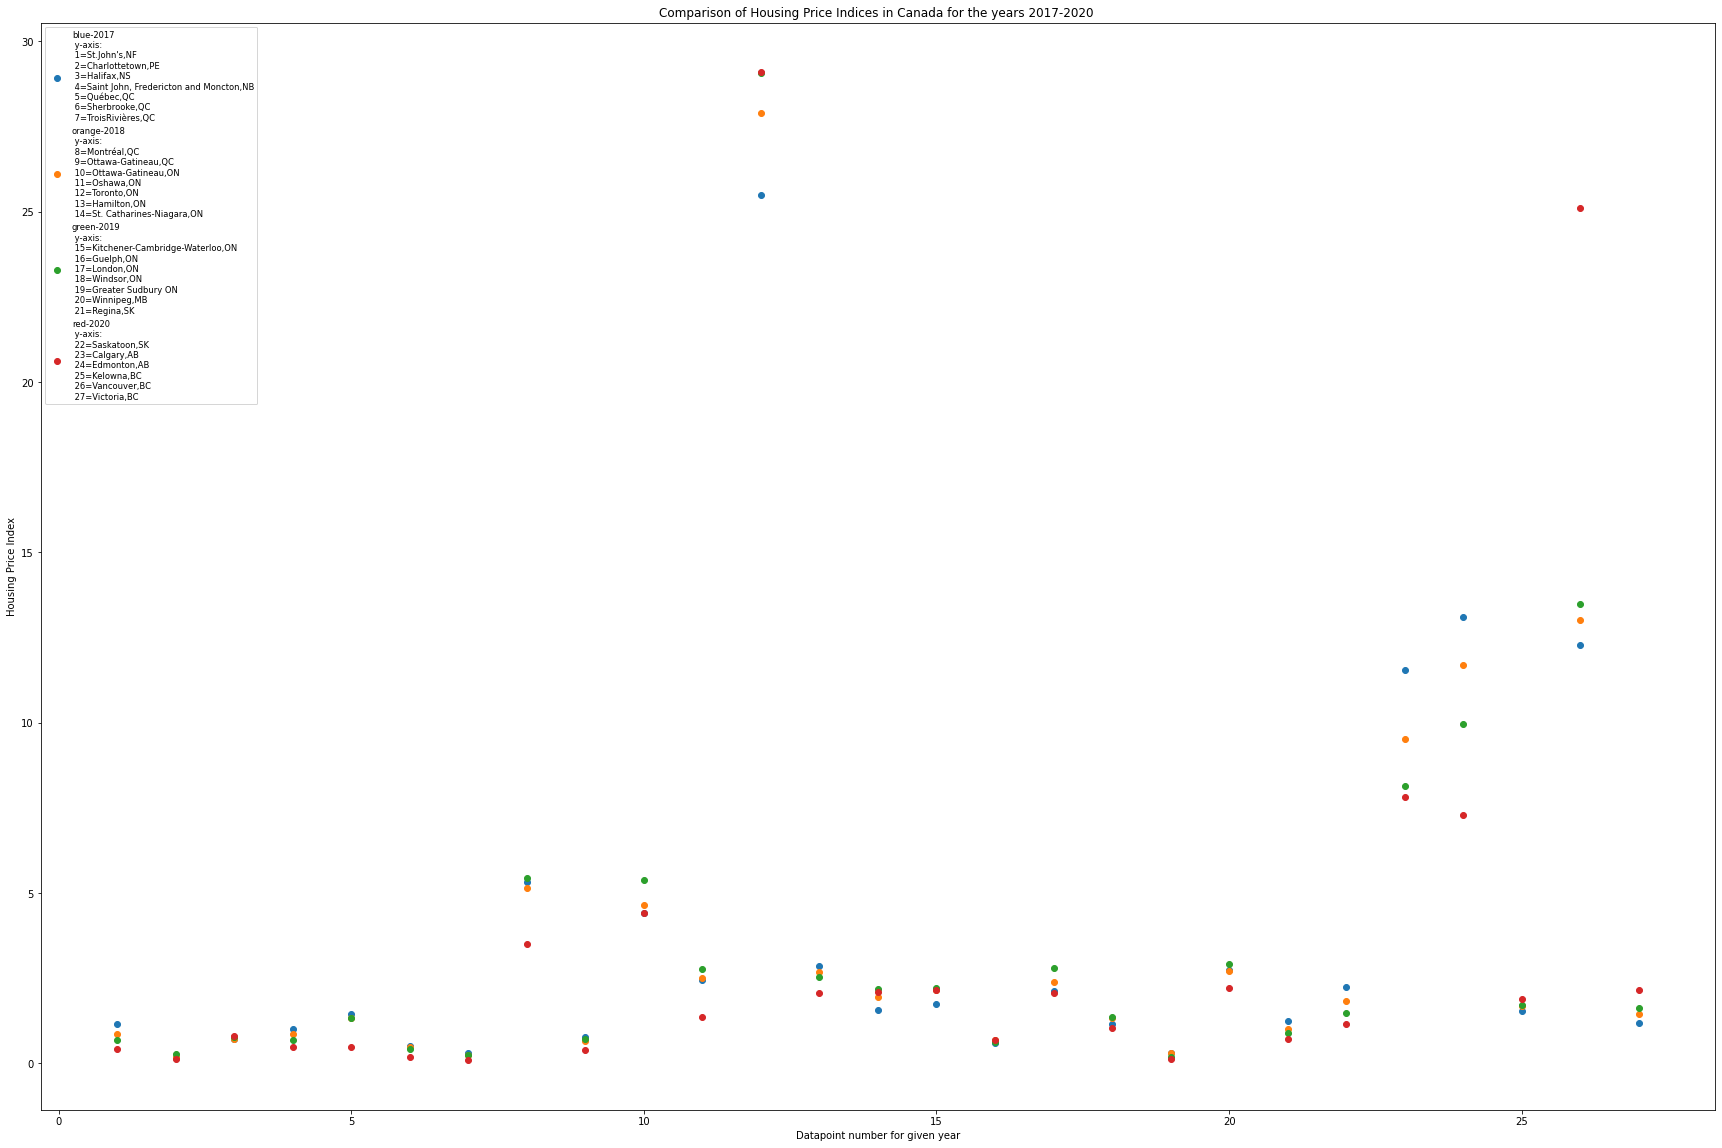

In [ ]:
# The following scatterplot evaluates the Housing Price Index for the years
# 2017, 2018, 2019, and 2020, which are represented by the blue markings, orange
# markings, green markings, and red markings respectively. The vertical axis
# represents the Housing Price Index as a percentage.

# Because the amount of data collected for each of the years from 2017 - 2020
# are the same, the data points for each year are spread across the horizontal
# axis.

# Lastly, in the legend, we list the locations in Canada that were recorded in 
# each of the years from 2017 to 2020.

# First, partition the 'VALUE' column of the housing1 data frame
# into four intervals, and assign the resulting intervals
# to Value_2017, Value_2018, Value_2019, Value_2020 which
# we define to be series indexed by the same indices as 
# the housing1 data frame.

Value_2017=housing1['VALUE'][1:28]
Value_2018=housing1['VALUE'][29:56]
Value_2019=housing1['VALUE'][57:84]
Value_2020=housing1['VALUE'][85:112]

# Second, define a series called Replacement consisting of the integers
# from 1 to 27 inclusive. This series serves as a placeholder
# for plotting the four series defined above. Specifically,
# if the series above are represented by a collection of "y-coordinates",
# then the Replacement series gives their corresponding "x-coordinates" 
# so that the scatter plot below is properly positioned. 

Replacement=pd.Series(range(1,28))

# Lastly, construct the scatterplot using the above series as data.

import matplotlib.pyplot as plt
labels=["blue-2017\n y-axis:\n 1=St.John's,NF\n 2=Charlottetown,PE\n 3=Halifax,NS\n 4=Saint John, Fredericton and Moncton,NB\n 5=Québec,QC\n 6=Sherbrooke,QC\n 7=TroisRivières,QC", 'orange-2018\n y-axis:\n 8=Montréal,QC\n 9=Ottawa-Gatineau,QC\n 10=Ottawa-Gatineau,ON\n 11=Oshawa,ON\n 12=Toronto,ON\n 13=Hamilton,ON\n 14=St. Catharines-Niagara,ON','green-2019\n y-axis:\n 15=Kitchener-Cambridge-Waterloo,ON\n 16=Guelph,ON\n 17=London,ON\n 18=Windsor,ON\n 19=Greater Sudbury ON\n 20=Winnipeg,MB\n 21=Regina,SK','red-2020\n y-axis:\n 22=Saskatoon,SK\n 23=Calgary,AB\n 24=Edmonton,AB\n 25=Kelowna,BC\n 26=Vancouver,BC\n 27=Victoria,BC']
plt.scatter(Replacement,Value_2017)
plt.scatter(Replacement,Value_2018)
plt.scatter(Replacement,Value_2019)
plt.scatter(Replacement,Value_2020)
plt.title('Comparison of Housing Price Indices in Canada for the years 2017-2020 ')
plt.ylabel('Housing Price Index')
plt.xlabel('Datapoint number for given year')
plt.legend(labels,loc='upper left',fontsize='small')
plt.rcParams['figure.figsize'] = [30, 20] 
plt.show()